In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

$$\theta = \begin{bmatrix} \theta_0 \theta_1 \cdots \theta_n
\end{bmatrix}$$

### Hypothesis Function
$$
h_{\theta}(x) = \sum \theta_i x_i
$$

```python
h_x = x.dot(theta)
```

In [5]:
def hypothesis(X, theta):
    # (m, n + 1) (n + 1, 1) --> (m, 1)
    return X.dot(theta)

### Cost
$$
J_{\theta}(X) = \frac{1}{m} \sum (h_{\theta}(x_i) - y_i) ^ 2
$$

In [6]:
# X (m , n + 1)
# Y (m, 1)
# theta (n + 1, 1)
def cost(X, Y, theta):
    y_hat = hypothesis(X, theta) # (m, 1)
    return ((y_hat - Y) ** 2).mean()

### Gradient 
$$
\frac{\delta J}{\delta \theta_j} = \frac{1}{m} \Sigma_{i \in m} (h(x^{(i)}) - y^{(i)}) x^{(i)}_j
$$

Vectorized will be 

$$
\frac{\delta J}{\delta \theta} = \frac{1}{m} X^{T} \cdot (h(X) - Y)
$$

```python
theta_0 := theta_0 - lr * (dJ/dtheta_0)
    
vectorized
theta := theta - lr * (dJ / d theta)
```

In [7]:
def gradient(X, Y, theta): # (n + 1, 1) [dJ/dheta0 dJ/theta1 dJ/theta2 .... dJ/thetan_n]
    m, _ = X.shape
    y_hat = hypothesis(X, theta)
    return X.T.dot(y_hat - Y) / m

In [8]:
# X : (m, n)
# Y : (m, 1)
def gradient_descent(X, Y, lr=.01, max_iter=100, verbose=True):
    m, n = X.shape
    theta = np.zeros((n, 1))
    costs = [] 
    for i in range(max_iter):
        error = cost(X, Y, theta)
        costs.append(error)
        
        theta -= lr * gradient(X, Y, theta)
        
        if i % 100 == 0 and verbose:
            print(f'cost at iteration {i} is {error}')
    return theta, costs

In [9]:
X = np.array([[1], [2], [3]])
Y = np.array([[2], [4], [6]])

In [10]:
X

array([[1],
       [2],
       [3]])

In [11]:
Y

array([[2],
       [4],
       [6]])

In [12]:
theta, costs = gradient_descent(X, Y, lr=.1, max_iter=1_000)

cost at iteration 0 is 18.666666666666668
cost at iteration 100 is 0.0
cost at iteration 200 is 0.0
cost at iteration 300 is 0.0
cost at iteration 400 is 0.0
cost at iteration 500 is 0.0
cost at iteration 600 is 0.0
cost at iteration 700 is 0.0
cost at iteration 800 is 0.0
cost at iteration 900 is 0.0


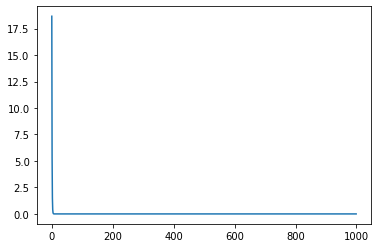

In [13]:
plt.plot(costs)
plt.show()

In [14]:
theta

array([[2.]])

In [15]:
hypothesis(np.array([1, 10]), theta)

ValueError: shapes (2,) and (1,1) not aligned: 2 (dim 0) != 1 (dim 0)

## Creating our data
```python
X: (m, n) --> (m, n + 1)
Y: (m, 1)
beta: (n + 1, 1)
e: (m, 1) -> Normally distributed
y = x . beta + e
```

```python
X = np.random.rand(m, n)
X = np.insert(X, 0, 1, axis=1)
beta = np.random.rand(n + 1, 1)
e = np.random.randn(size=())
```

In [16]:
m, n = 100, 1
X = np.random.rand(m, n)
X = np.insert(X, 0, 1, axis=1)
beta = np.random.rand(n + 1, 1)
sigma = .05
e = sigma * np.random.randn(m, 1)
Y = X.dot(beta) + e

In [21]:
Y

array([[0.96604303],
       [1.18959696],
       [0.91476998],
       [1.05646525],
       [1.06173346],
       [0.8486796 ],
       [1.00809858],
       [0.9218713 ],
       [0.85957891],
       [0.9851405 ],
       [1.00525097],
       [0.96292358],
       [0.88966515],
       [1.04484773],
       [1.06407288],
       [0.85476762],
       [1.09471009],
       [0.95335555],
       [1.0330013 ],
       [1.11046282],
       [1.07312057],
       [1.10015087],
       [0.93737042],
       [1.03653823],
       [0.96238033],
       [0.91656214],
       [1.08803716],
       [0.90217485],
       [0.82990728],
       [0.97252118],
       [0.98860641],
       [1.06114941],
       [0.88976793],
       [0.90619626],
       [1.17984296],
       [0.9353374 ],
       [1.16312038],
       [0.96536443],
       [0.87135509],
       [1.08604472],
       [0.96396137],
       [0.8987412 ],
       [0.92840553],
       [1.13051644],
       [0.92368239],
       [0.94042402],
       [1.04142932],
       [1.132

In [114]:
Y.shape

(100, 1)

In [122]:
theta, costs = gradient_descent(X, Y, lr=.5, max_iter=10_000, verbose=False)

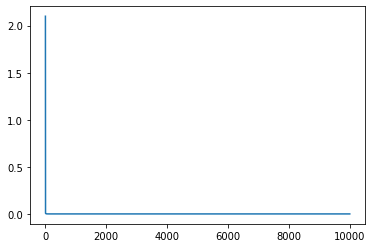

In [123]:
plt.plot(costs)
plt.show()

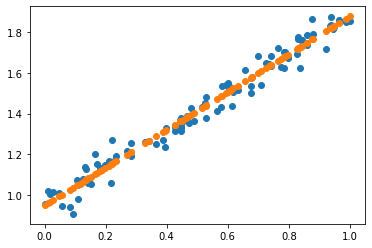

In [124]:
plt.scatter(X[:, 1], Y)
plt.scatter(X[:, 1], hypothesis(X, theta))
plt.show()

In [81]:
def evaluate(Y_actual, Y_pred):
    num = ((Y_actual - Y_pred) ** 2).sum()
    denom = ((Y_actual - Y_actual.mean()) ** 2).sum()
    return (1 - (num / denom)) * 100

In [120]:
evaluate(Y, hypothesis(X, theta))

97.20363255343666